# Bike Sharing Assignment
## Author: Kumaraguru Muthuraj

#### Problem Statement
BoomBikes wants to understand the meteorological and human lifestyle patterns that affect the shared bike demand in USA.

#### Solution
We will apply some exploratory and predictive data analytics to understand, the weather and human factors that influence bike demand for BoomBikes. Specifically, we will apply multiple linear regression technique to find out the factors that strongly influence bike demand.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Step 1. Import the libraries and check for null data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bikes = pd.read_csv("day.csv")

print(bikes.shape)
bikes.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bikes.info()
bikes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Good that we don't have any null values to be imputed

### Step 2. Let's do some EDA
- #### The problem description says not to remove 'yr'. 
- #### 'instant' is an index that can be dropped. 
- #### 'dteday' is already available as yr, mnth, weekday, holiday. Drop 'dteday'. 
- #### Since the problems is to find demand that is reflected by 'cnt' and not the individual types 'casual' and 'registered', we can safely drop these 2 columns
 

In [6]:
#Drop unnecessary columns after reading the data dictionary and problem statement
bikes.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

### Fix the categorical variables to be readable.

In [7]:
# List of variables to map

#Change categorical variables with string values so that dummys pick the names
#season, month, weekday, weathersit

# Defining the map function
def fixSeason(x):
    ret = 'invalid'
    if x == 1:
        ret = 'spring'
    elif x == 2:
        ret = 'summer'
    elif x == 3:
        ret = 'fall'
    elif x == 4:
        ret = 'winter'
    return ret
    
def fixMonth(x):
    ret = 'invalid'
    if x == 1:
        ret = 'jan'
    elif x == 2:
        ret = 'feb'
    elif x == 3:
        ret = 'mar'
    elif x == 4:
        ret = 'apr'
    elif x == 5:
        ret = 'may'
    elif x == 6:
        ret = 'jun'
    elif x == 7:
        ret = 'jul'
    elif x == 8:
        ret = 'aug'
    elif x == 9:
        ret = 'sep'
    elif x == 10:
        ret = 'oct'
    elif x == 11:
        ret = 'nov'
    elif x == 12:
        ret = 'dec'
        
    return ret

def fixWeekday(x):
    ret = 'invalid'
    if x == 0:
        ret = 'sun'
    elif x == 1:
        ret = 'mon'
    elif x == 2:
        ret = 'tue'
    elif x == 3:
        ret = 'wed'
    elif x == 4:
        ret = 'thu'
    elif x == 5:
        ret = 'fri'
    elif x == 6:
        ret = 'sat'
        
    return ret

def fixWeathersit(x):
    ret = 'invalid'
    if x == 1:
        ret = 'clear'
    elif x == 2:
        ret = 'cloudy'
    elif x == 3:
        ret = 'lightsnowrain'
    elif x == 4:
        ret = 'heavysnowrain'
       
    return ret



In [8]:
# Applying the mapping functions to the bikes dataframe
bikes['season'] = bikes['season'].apply(fixSeason)
bikes['mnth'] = bikes['mnth'].apply(fixMonth)
bikes['weekday'] = bikes['weekday'].apply(fixWeekday)
bikes['weathersit'] = bikes['weathersit'].apply(fixWeathersit)

In [9]:
# Check if the values are mapped correctly
# Since there are no 'invalid' counts we are good to go
print(bikes.season.value_counts())
print(bikes.mnth.value_counts())
print(bikes.weekday.value_counts())
print(bikes.weathersit.value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
jul    62
may    62
mar    62
aug    62
oct    62
jan    62
dec    62
nov    60
jun    60
apr    60
sep    60
feb    56
Name: mnth, dtype: int64
mon    105
sat    105
sun    105
fri    104
thu    104
tue    104
wed    103
Name: weekday, dtype: int64
clear            463
cloudy           246
lightsnowrain     21
Name: weathersit, dtype: int64


In [10]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Pair plot the numeric values and do a correlation to understand data

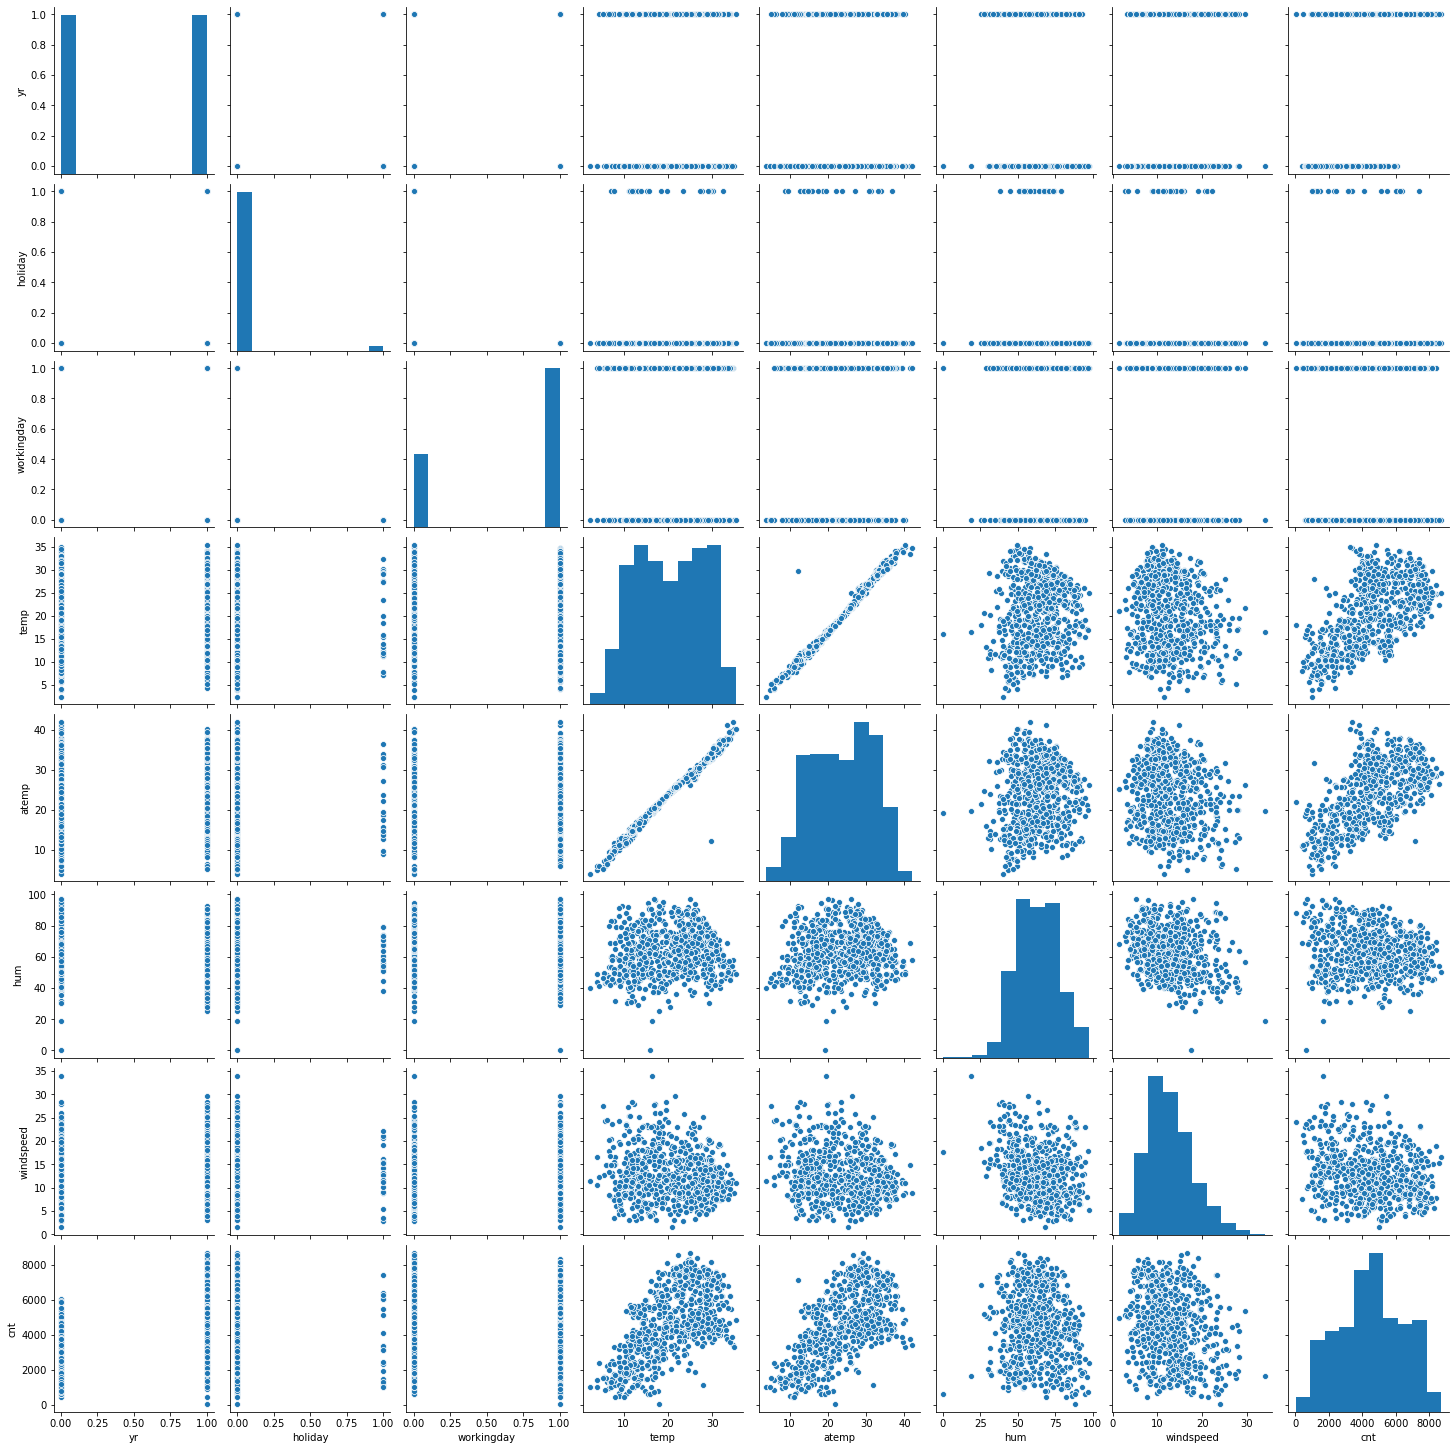

In [11]:
sns.pairplot(bikes)
plt.show()

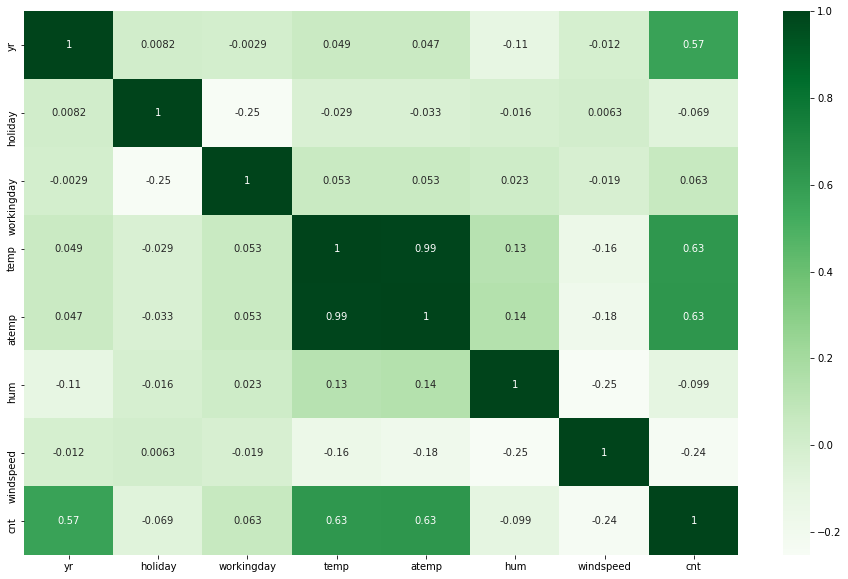

In [12]:
plt.figure(figsize = (16, 10))
sns.heatmap(bikes.corr(), annot = True, cmap="Greens")
plt.show()

### Observations
- #### Out of temp, hum and windspeed, we observe that only temp has some kind of relationship with 'cnt'.
- #### 'temp' has some linear relationship (atleast visually), strongly supported by 0.63 Correlation Coeff -> Strong candiate for Linear Regression.
- #### There is also a correlation between demand - year and demand - temperature.
- #### There is a correlation of 0.99 between temp and atemp. Strong relationship seen in the pairplpot. They mean the same. So drop 'atemp'.
- #### No extreme Outliers seen from the box plots for demand. No removal of outliers will be done.

In [13]:
#Drop unnecessary columns after reading the data dictionary and problem statement
bikes.drop(['atemp'], axis = 1, inplace = True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


### A handful of multi-variate analysis that could support Predictive Data Analytics.
- #### There is strong growth of 60% in the second year.
- #### Weather for sure has an impact on demand, looks like demand is reasonably high even in December and Jan winter.
- #### Irrespective of year, season only weather drives demand.
- #### Day of week doesn't have any impact on demand.
- #### Holidays see no demand.


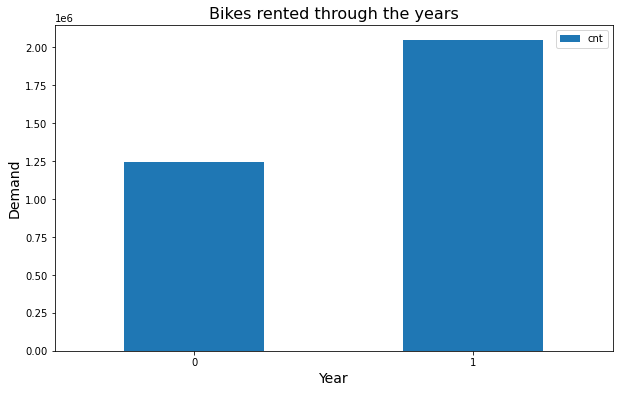

In [14]:
pt = pd.pivot_table(data=bikes, values=['cnt'], index=['yr'], aggfunc=np.sum)
pt.plot(kind="bar", figsize=[10,6])
plt.title("Bikes rented through the years", fontsize = 16) 
plt.xlabel("Year", fontsize=14)
plt.ylabel("Demand", fontsize=14)
plt.xticks(rotation=0)
plt.show()

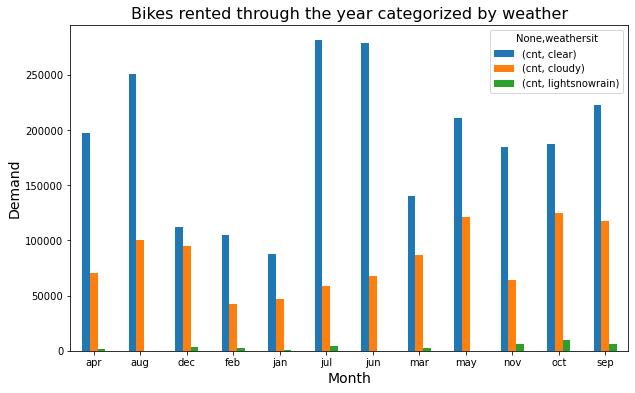

In [15]:
pt = pd.pivot_table(data=bikes, columns=['weathersit'], values=['cnt'], index=['mnth'], aggfunc=np.sum)
pt.plot(kind="bar", figsize=[10,6])
plt.title("Bikes rented through the year categorized by weather", fontsize = 16) 
plt.xlabel("Month", fontsize=14)
plt.ylabel("Demand", fontsize=14)
plt.xticks(rotation=0)
plt.show()

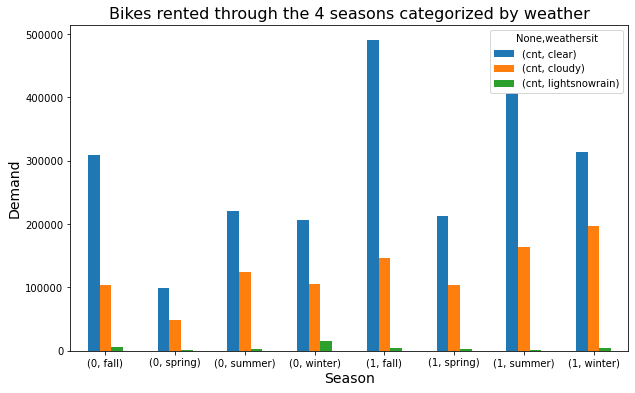

In [16]:
pt = pd.pivot_table(data=bikes, columns=['weathersit'], values=['cnt'], index=['yr', 'season'], aggfunc=np.sum)
pt.plot(kind="bar", figsize=[10,6])
plt.title("Bikes rented through the 4 seasons categorized by weather", fontsize = 16) 
plt.xlabel("Season", fontsize=14)
plt.ylabel("Demand", fontsize=14)
plt.xticks(rotation=0)
plt.show()

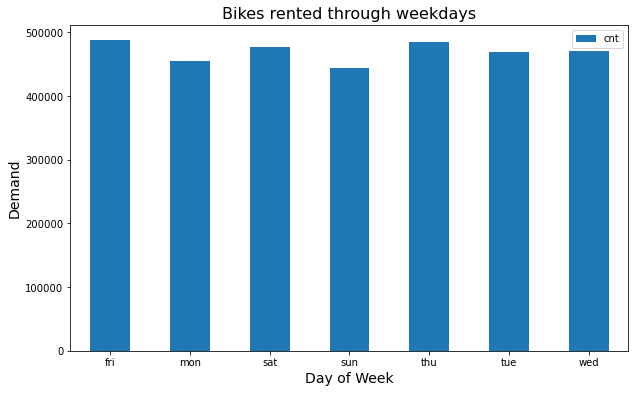

In [17]:
pt = pd.pivot_table(data=bikes, values=['cnt'], index=['weekday'], aggfunc=np.sum)
pt.plot(kind="bar", figsize=[10,6])
plt.title("Bikes rented through weekdays", fontsize = 16) 
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Demand", fontsize=14)
plt.xticks(rotation=0)
plt.show()

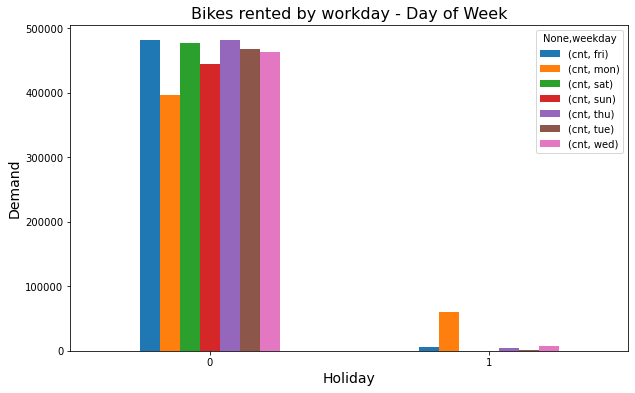

In [18]:
pt = pd.pivot_table(data=bikes, columns=['weekday'], values=['cnt'], index=['holiday'], aggfunc=np.sum)
pt.plot(kind="bar", figsize=[10,6])
plt.title("Bikes rented by workday - Day of Week", fontsize = 16) 
plt.xlabel("Holiday", fontsize=14)
plt.ylabel("Demand", fontsize=14)
plt.xticks(rotation=0)
plt.show()

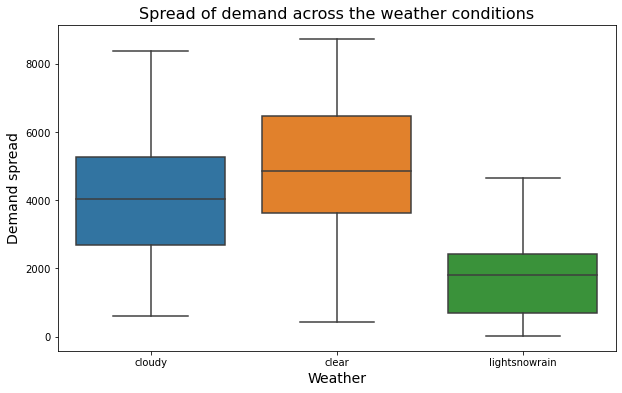

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(y='cnt', x='weathersit', data=bikes)
plt.ylabel('Demand spread', fontsize=14)
plt.xlabel('Weather', fontsize=14)
plt.title('Spread of demand across the weather conditions', fontsize=16)
plt.show()

### Step 3. Let's do Linear Regression to understand the factors influencing demand.
### 'temp' has some linear relationship (atleast visually), strongly supported by 0.63 Correlation Coeff. This signals that we can predict the factors influencing demand by Linear Regression.

#### Get dummy columns for season, weekday, mnth and weathersit

In [20]:
status = pd.get_dummies(bikes['season'], drop_first = True)
bikes = pd.concat([bikes, status], axis = 1)
bikes.drop(['season'], axis = 1, inplace = True)

In [21]:
status = pd.get_dummies(bikes['weekday'], drop_first = True)
bikes = pd.concat([bikes, status], axis = 1)
bikes.drop(['weekday'], axis = 1, inplace = True)


In [22]:
status = pd.get_dummies(bikes['mnth'], drop_first = True)
bikes = pd.concat([bikes, status], axis = 1)
bikes.drop(['mnth'], axis = 1, inplace = True)

In [23]:
status = pd.get_dummies(bikes['weathersit'], drop_first = True)
bikes = pd.concat([bikes, status], axis = 1)
bikes.drop(['weathersit'], axis = 1, inplace = True)

In [24]:
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,cloudy,lightsnowrain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Split data to train and test

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'cloudy', 'lightsnowrain'],
      dtype='object')

#### Apply MinMaxScaler to all the numeric variables

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the X vars (that are numeric) and 'dummy' variables
toScale_Vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[toScale_Vars] = scaler.fit_transform(df_train[toScale_Vars])

In [28]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,jan,jul,jun,mar,may,nov,oct,sep,cloudy,lightsnowrain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

In [29]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building our model
This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### Apply RFE, start with 15 features.

In [30]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('cloudy', True, 1),
 ('lightsnowrain', True, 1)]

In [33]:
#There are 15 columns that RFE as 'favourably' supported.
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'sat', 'jan', 'jul', 'sep', 'cloudy',
       'lightsnowrain'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['mon', 'sun', 'thu', 'tue', 'wed', 'aug', 'dec', 'feb', 'jun', 'mar',
       'may', 'nov', 'oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [36]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

### Iteration 0
#### Start with the 15 Supported features, provided by RFE

In [37]:
lm = sm.OLS(y_train, X_train_rfe).fit()   # Running the linear model

In [38]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          2.31e-191
Time:                        22:07:51   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

In [39]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
7,spring,5.08
4,temp,3.89
9,winter,3.60
8,summer,2.64
5,hum,1.92
3,workingday,1.88
10,sat,1.78
11,jan,1.57
14,cloudy,1.57


### Iteration 1

#### Note the p-values, R2 and Adj R2 are at 0.84, which is a good start. 
#### Between high p-value (for 'jan') and high VIF (for 'spring'), choose to drop 'jan'.

In [40]:
X_train_v1 = X_train_rfe.drop(["jan"], axis = 1)

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_v1 = sm.add_constant(X_train_v1)

In [42]:
lm = sm.OLS(y_train, X_train_v1).fit()   # Running the linear model

In [43]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          1.13e-191
Time:                        22:07:51   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2394      0.036      6.696

In [44]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_v1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.34
7,spring,5.02
4,temp,3.62
9,winter,3.49
8,summer,2.61
5,hum,1.91
3,workingday,1.88
10,sat,1.78
13,cloudy,1.57
11,jul,1.49


### Iteration 2

#### Note the p-values are in limit, VIFs (spring>5), R2 and Adj R2 are at 0.84 plus, which is sustained. 
#### Drop spring with VIF greater than 5

In [45]:
#Between high p-values good and high VIF (for 'spring'), choose to drop 'spring'
X_train_v2 = X_train_v1.drop(["spring"], axis = 1)

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_v2 = sm.add_constant(X_train_v2)

In [47]:
lm = sm.OLS(y_train, X_train_v2).fit()   # Running the linear model

In [48]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          2.77e-191
Time:                        22:07:52   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1815      0.029      6.311

In [49]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_v2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.63
5,hum,1.89
3,workingday,1.88
9,sat,1.78
4,temp,1.60
12,cloudy,1.56
10,jul,1.43
7,summer,1.33
8,winter,1.29
13,lightsnowrain,1.24


### Since VIF is < 5 and p value < 0.05, we stop here because the model has a very high R2, Adj R2 and F-Statistic and Prob(F-Statistic) is almost 0. Constant we are not removing, for reasons mentioned in this wiki. 
#### https://stats.stackexchange.com/questions/7948/when-is-it-ok-to-remove-the-intercept-in-a-linear-regression-model

## Residual Analysis of the train data

### Scatter plot (between y_train and y_train_pred) that shows that they are linear (Note that the net effect of all features X is y_pred), which implies linear relationship between Xs and ‘cnt’.

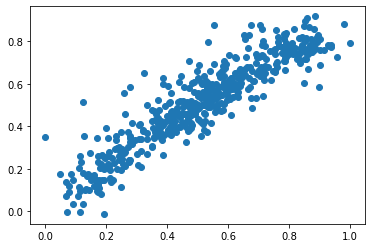

In [50]:
y_train_pred = lm.predict(X_train_v2)

# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(y_train, y_train_pred)
plt.show()

### Note that the below distribution plot to shows that the error terms are normally distributed. Also see that the mean and median are very close - A property of Normal distribution.

Text(0.5, 0, 'Errors')

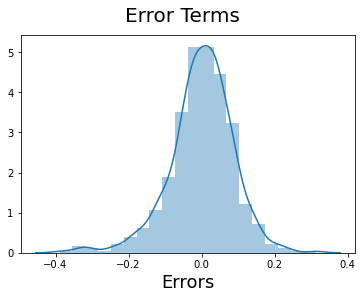

In [51]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
res = (y_train - y_train_pred)
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [52]:
res.describe()
print('Mean ', round(res.mean(), 5))
print('Median ', round(res.median(), 5))

Mean  -0.0
Median  0.00623


### Scatter plot of errors to know if there are any patterns or independence.
### Regplot (yellow line), to check if the error terms are having uniform variance (distance) from it - Homoscedasticity.

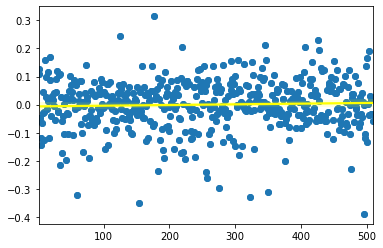

In [53]:
c = [i for i in range(1, len(res)+1, 1)]
plt.scatter(c, res)
sns.regplot(x=c, y=res, line_kws={'color': 'yellow'})
plt.show()

In [54]:
X_train_no_const = X_train_v2.drop(['const'], axis=1)

### Step 4. Making predictions using the final model.

### Now that all is done, we need to test the model with test data.

In [55]:
#Scale on test set
toScale_Vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[toScale_Vars] = scaler.transform(df_test[toScale_Vars])

In [56]:
#### Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [57]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_no_const.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

In [58]:
X_test_new.describe()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,winter,sat,jul,sep,cloudy,lightsnowrain
count,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.0,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.264840,0.232877,0.118721,0.105023,0.086758,0.319635,0.027397
std,0.0,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.442259,0.423633,0.324202,0.307285,0.282125,0.467403,0.163612
min,1.0,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'y_pred')

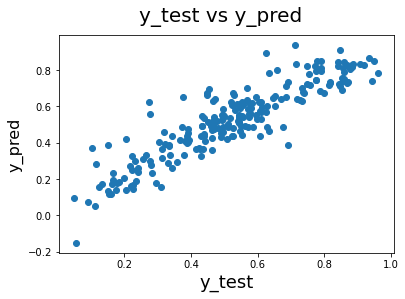

In [59]:
# Plotting y_test and y_pred to understand the spread.
# All looks good here.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Step 5. The stability and health of the model is decided by the R2 value of the test data. Let's print it and call it done if the difference is less than 5%

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r_squared = r2_score(y_train, y_train_pred)

print("*************************************************")
print("The R2 value of the TRAIN data set is ", r_squared)
print("*************************************************")

r_squared = r2_score(y_test, y_pred)
print("The R2 value of the TEST data set is ", r_squared)
print("*************************************************")

*************************************************
The R2 value of the TRAIN data set is  0.8451452781142546
*************************************************
The R2 value of the TEST data set is  0.8064517675562801
*************************************************


### Since the difference between R2 of test and train data is less than 4%, we say that our model is stable.

#### The final model - Linear Equation is
### $y = 0.1815 \
+ 0.2284 * yr \ 
- 0.0611 * holiday \ 
+ 0.0436 * workingday \ 
+ 0.5945 * temp \
- 0.1708 * hum \ 
- 0.1877 * windspeed \
+ 0.0806 * summer \
+ 0.1368 * winter \
+ 0.0535 *sat \ 
- 0.0456 * jul \  
+ 0.0945 * sep \ 
- 0.0554 * cloudy \
- 0.2414 * lightsnowrain $ 

#### Observe that our EDA said that year, temperature and weathersit have strong influence on the demand of bikes and this is confirmed by Linear Regression model.

#### END OF NOTEBOOK